In [1]:
import pathlib
import itertools
from enum import StrEnum

import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns

from swift_comet_pipeline.aperture.q_vs_aperture_radius_entry import (
    q_vs_aperture_radius_entry_list_from_dataframe,
)
from swift_comet_pipeline.lightcurve.lightcurve import dataframe_to_lightcurve, lightcurve_to_dataframe
from swift_comet_pipeline.lightcurve.lightcurve_aperture import (
    lightcurve_from_aperture_plateaus,
)
from swift_comet_pipeline.orbits.perihelion import find_perihelion
from swift_comet_pipeline.pipeline.files.pipeline_files import PipelineFiles
from swift_comet_pipeline.projects.configs import SwiftProjectConfig
from swift_comet_pipeline.stacking.stacking_method import StackingMethod
from swift_comet_pipeline.lightcurve.lightcurve import LightCurve
from swift_comet_pipeline.dust.reddening_correction import DustReddeningPercent
from swift_comet_pipeline.lightcurve.lightcurve_bayesian import bayesian_lightcurve_from_aperture_lightcurve, bayesian_lightcurve_to_dataframe
from swift_comet_pipeline.tui.tui_common import (
    clear_screen,
    get_selection,
    stacked_epoch_menu,
    wait_for_key,
)

In [2]:
def load_aperture_lightcurve(swift_project_config: SwiftProjectConfig) -> LightCurve:
    pipeline_files = PipelineFiles(swift_project_config.project_path)
    data_ingestion_files = pipeline_files.data_ingestion_files
    epoch_subpipeline_files = pipeline_files.epoch_subpipelines

    if data_ingestion_files.epochs is None:
        print("No epochs found!")
        return

    if epoch_subpipeline_files is None:
        print("No epochs available to stack!")
        return

    stacking_method = StackingMethod.summation

    t_perihelion_list = find_perihelion(data_ingestion_files=data_ingestion_files)
    if t_perihelion_list is None:
        print("Could not find time of perihelion!")
        return
    t_perihelion = t_perihelion_list[0].t_perihelion

    # aperture productions
    aperture_lc = lightcurve_from_aperture_plateaus(
        pipeline_files=pipeline_files,
        stacking_method=stacking_method,
        t_perihelion=t_perihelion,
    )

    if aperture_lc is None:
        return

    return aperture_lc

In [3]:
from swift_comet_pipeline.projects.configs import read_swift_project_config
# this folder has the pipeline calculating production for dust redness -100% through 100%
#wift_project_config_path = pathlib.Path("/Users/shawnoset/swift_analysis/C_2016R2/config.yaml")
swift_project_config_path = pathlib.Path("/Users/shawnoset/swift_analysis/C_2013US10_bayestest/config.yaml")
swift_project_config = read_swift_project_config(config_path=swift_project_config_path)

In [4]:
ap_lc = load_aperture_lightcurve(swift_project_config=swift_project_config)

In [5]:
# reduced_df = lightcurve_from_apertures_bayesian(lc=ap_lc, mean_reddening=45.0, sigma_reddening=2.5)
# print(reduced_df[['rh_au', 'posterior_q', 'non_detection']])

In [6]:
blc = bayesian_lightcurve_from_aperture_lightcurve(lc=ap_lc, mean_reddening=40.0, sigma_reddening=1.0)
# print(reduced_df[['rh_au', 'posterior_q', 'non_detection_probability']])
print(bayesian_lightcurve_to_dataframe(blc=blc))
#sns.pairplot(reduced_df, hue='observation_time')
#sns.regplot(data=reduced_df, x='rh_au', y='posterior_q')
#sns.lineplot(data=reduced_df, x='rh_au', y='posterior_q')
#sns.displot(data=reduced_df, x='rh_au', y='non_detection_probability', kind='kde', rug=True)

              observation_time  time_from_perihelion_days     rh_au  \
0   2014-08-14 16:59:10.088235                -458.494843 -5.828429   
1   2014-11-05 15:19:51.281249                -375.563810 -5.030160   
2   2014-12-20 15:46:51.187500                -330.545061 -4.574920   
3   2015-04-28 13:11:18.611110                -201.653077 -3.158917   
4   2015-06-19 22:42:10.500000                -149.256644 -2.521261   
5   2015-08-11 23:23:10.062499                 -96.228165 -1.832436   
6   2015-09-01 10:29:33.350000                 -75.765395 -1.558396   
7   2016-02-11 04:12:26.815789                  86.972724  1.721369   
8   2016-03-14 06:52:16.928571                 119.083720  2.146684   
9   2016-04-10 12:42:49.968750                 146.327158  2.496119   
10  2016-08-19 11:00:27.185185                 277.256061  4.021740   
11  2016-11-24 12:56:08.541666                 374.336401  5.026661   

     posterior_q  non_detection_probability  
0   1.085146e+26              

In [7]:
#lightcurve_from_apertures_bayesian(lc=ap_lc, mean_reddening=40.0, sigma_reddening=2.5)

In [8]:
#lightcurve_from_apertures_bayesian(lc=ap_lc, mean_reddening=40.0, sigma_reddening=5.0)

In [9]:
#lightcurve_from_apertures_bayesian(lc=ap_lc, mean_reddening=40.0, sigma_reddening=10.0)

In [10]:
#lightcurve_from_apertures_bayesian(lc=ap_lc, mean_reddening=40.0, sigma_reddening=20.0)

In [11]:
#lightcurve_from_apertures_bayesian(lc=ap_lc, mean_reddening=30.0, sigma_reddening=5.0)

In [12]:
#lightcurve_from_apertures_bayesian(lc=ap_lc, mean_reddening=30.0, sigma_reddening=10.0)

In [13]:
#lightcurve_from_apertures_bayesian(lc=ap_lc, mean_reddening=20.0, sigma_reddening=10.0)

In [14]:
#lightcurve_from_apertures_bayesian(lc=ap_lc, mean_reddening=20.0, sigma_reddening=5.0)

In [15]:
dust_means = np.linspace(15.0, 65.0, num=11, endpoint=True)
dust_sigmas = [1.0, 2.5, 5.0, 10.0]

total_df_dict = {}
for dust_mean, dust_sigma in itertools.product(dust_means, dust_sigmas):
    blc = bayesian_lightcurve_from_aperture_lightcurve(lc=ap_lc, mean_reddening=dust_mean, sigma_reddening=dust_sigma)
    total_df_dict[dust_mean, dust_sigma] = bayesian_lightcurve_to_dataframe(blc=blc)

In [16]:
total_df = pd.concat(total_df_dict, axis=0).reset_index()
total_df = total_df.drop(columns=['level_2'])
total_df = total_df.rename(columns={'level_0': 'dust_mean', 'level_1': 'dust_sigma'})
total_df

,dust_mean,dust_sigma,observation_time,time_from_perihelion_days,rh_au,posterior_q,non_detection_probability
0,15.0,1.0,2014-08-14 16:59:10.088235,-458.494843,-5.828429,7.496409e+07,1.000000e+00
1,15.0,1.0,2014-11-05 15:19:51.281249,-375.563810,-5.030160,1.352026e+26,4.567171e-03
2,15.0,1.0,2014-12-20 15:46:51.187500,-330.545061,-4.574920,3.059015e+24,9.414419e-01
3,15.0,1.0,2015-04-28 13:11:18.611110,-201.653077,-3.158917,6.173270e+26,1.028054e-18
4,15.0,1.0,2015-06-19 22:42:10.500000,-149.256644,-2.521261,7.554478e+27,0.000000e+00
...,...,...,...,...,...,...,...
523,65.0,10.0,2016-02-11 04:12:26.815789,86.972724,1.721369,1.302171e+28,0.000000e+00
524,65.0,10.0,2016-03-14 06:52:16.928571,119.083720,2.146684,4.464992e+27,6.242004e-22
525,65.0,10.0,2016-04-10 12:42:49.968750,146.327158,2.496119,1.625796e+27,9.080536e-16
526,65.0,10.0,2016-08-19 11:00:27.185185,277.256061,4.021740,2.207034e+26,4.399491e-09


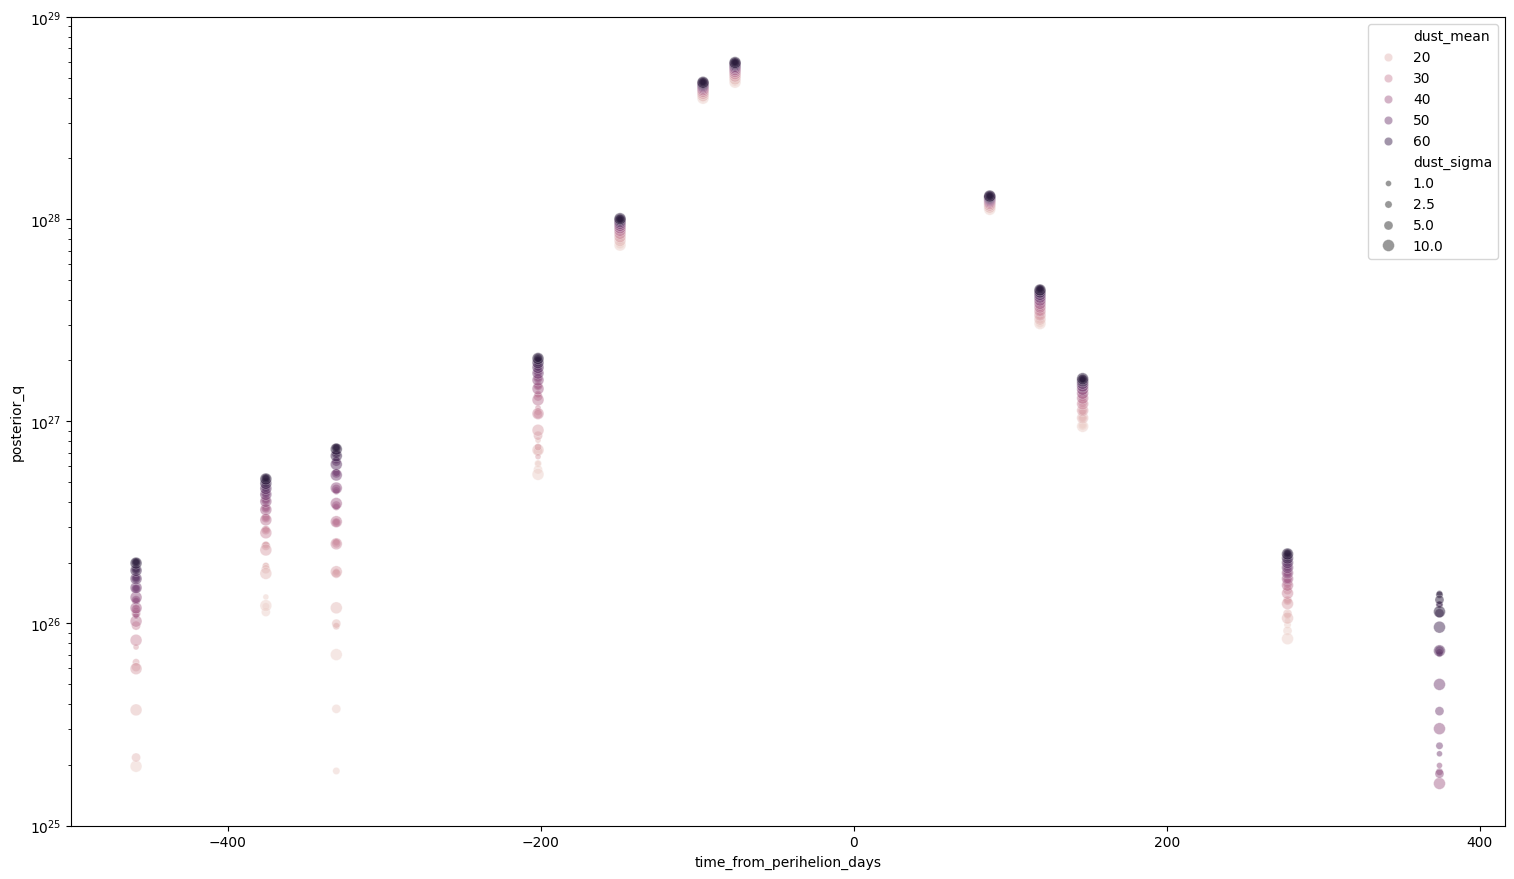

In [17]:
#sns.scatterplot(data=total_df, x='rh_au', y='posterior_q', hue='dust_mean', style='dust_sigma')
sns.scatterplot(data=total_df, x='time_from_perihelion_days', y='posterior_q', hue='dust_mean', size='dust_sigma', alpha=0.5)
plt.yscale('log')
plt.ylim(1.0e25, 1.0e29)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

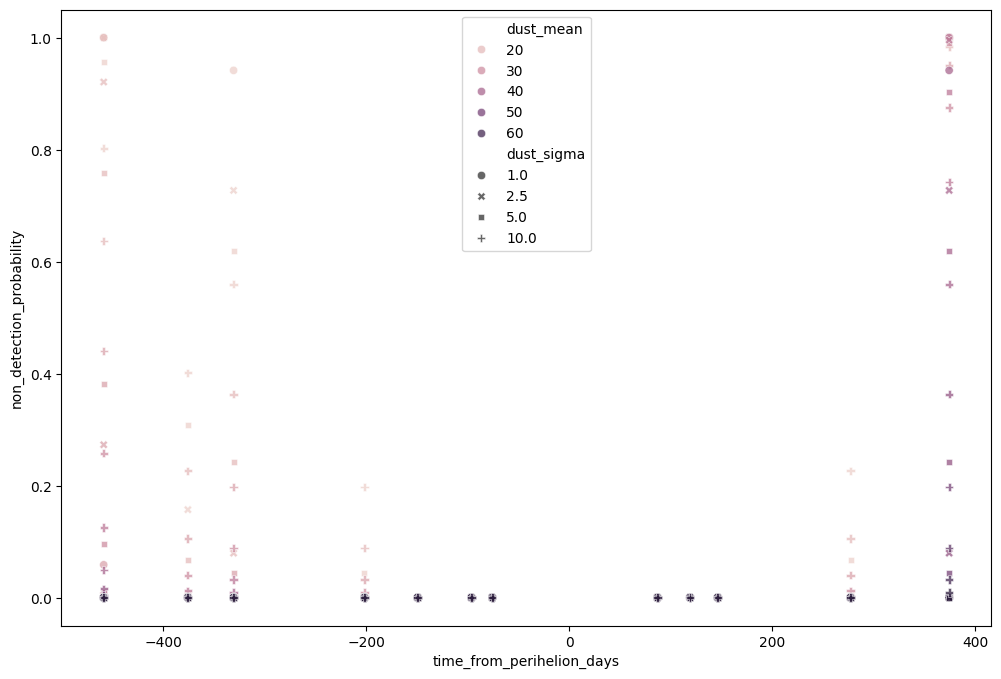

In [18]:
sns.scatterplot(data=total_df, x='time_from_perihelion_days', y='non_detection_probability', hue='dust_mean', style='dust_sigma', alpha=0.75)
fig = plt.gcf()
fig.set_size_inches(12, 8)

In [19]:
#sns.pairplot(total_df, hue='dust_mean')

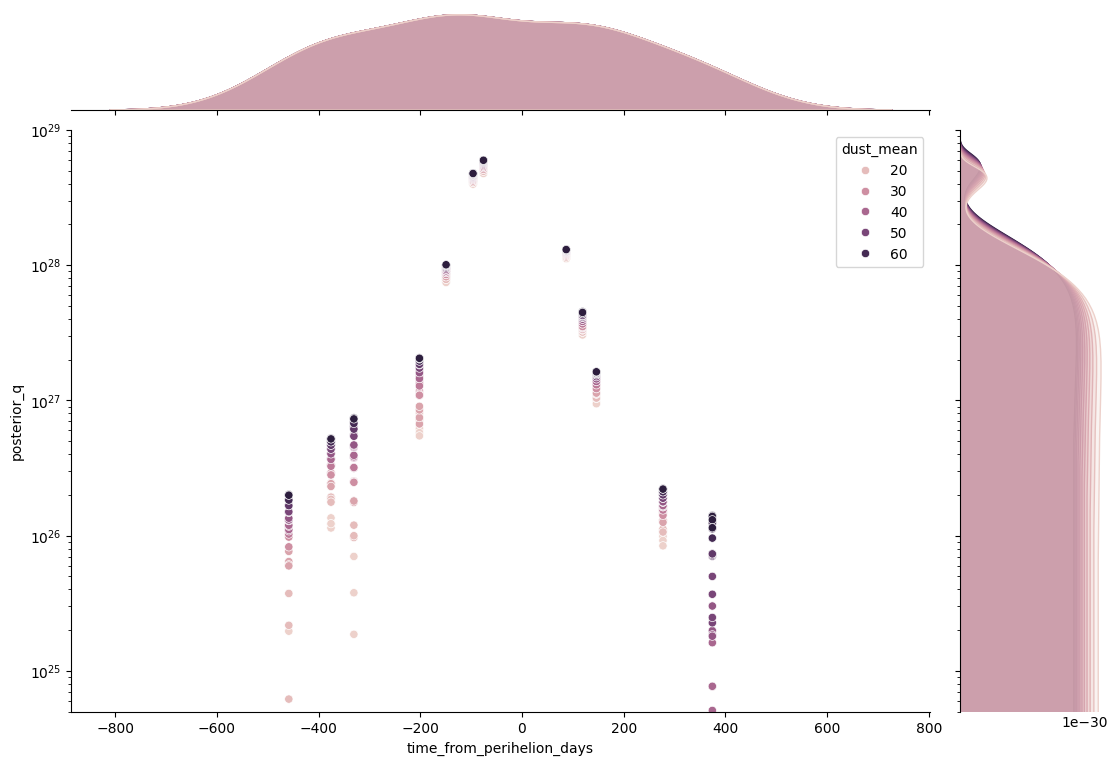

In [20]:
sns.jointplot(data=total_df, x='time_from_perihelion_days', y='posterior_q', hue='dust_mean')
plt.yscale('log')
plt.ylim(5.0e24, 1.0e29)
fig = plt.gcf()
fig.set_size_inches(12, 8)

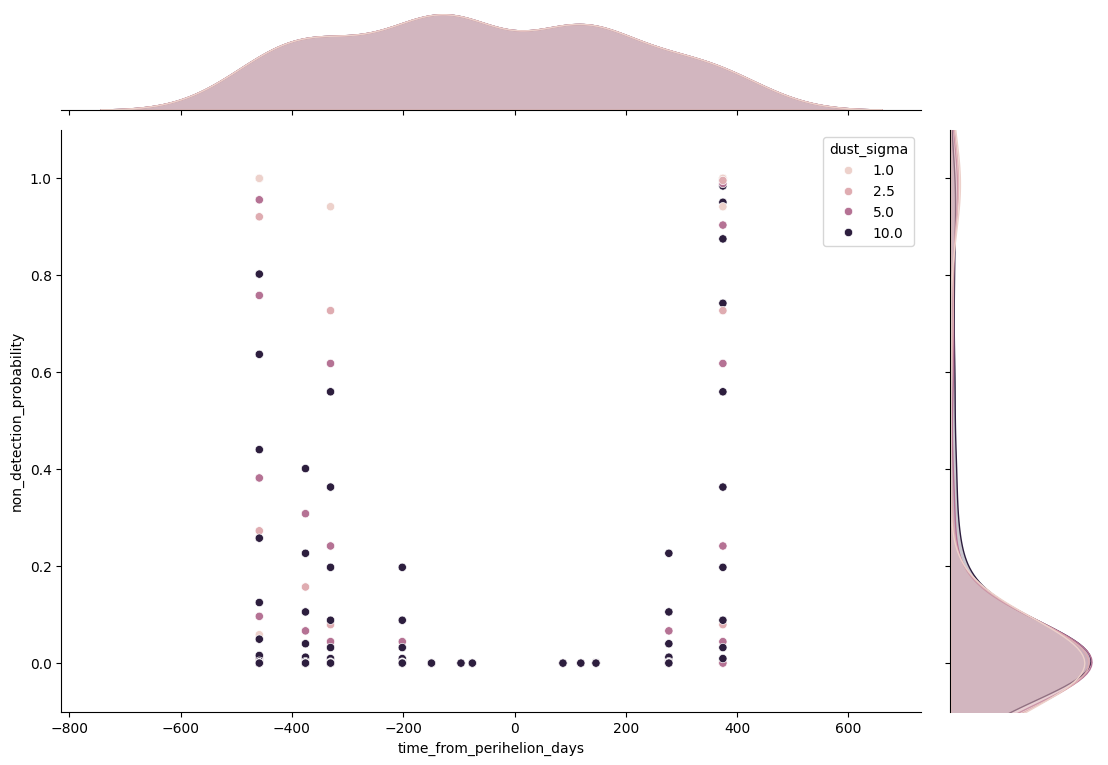

In [21]:
sns.jointplot(data=total_df, x='time_from_perihelion_days', y='non_detection_probability', hue='dust_sigma')
plt.ylim(-0.1, 1.1)
fig = plt.gcf()
fig.set_size_inches(12, 8)

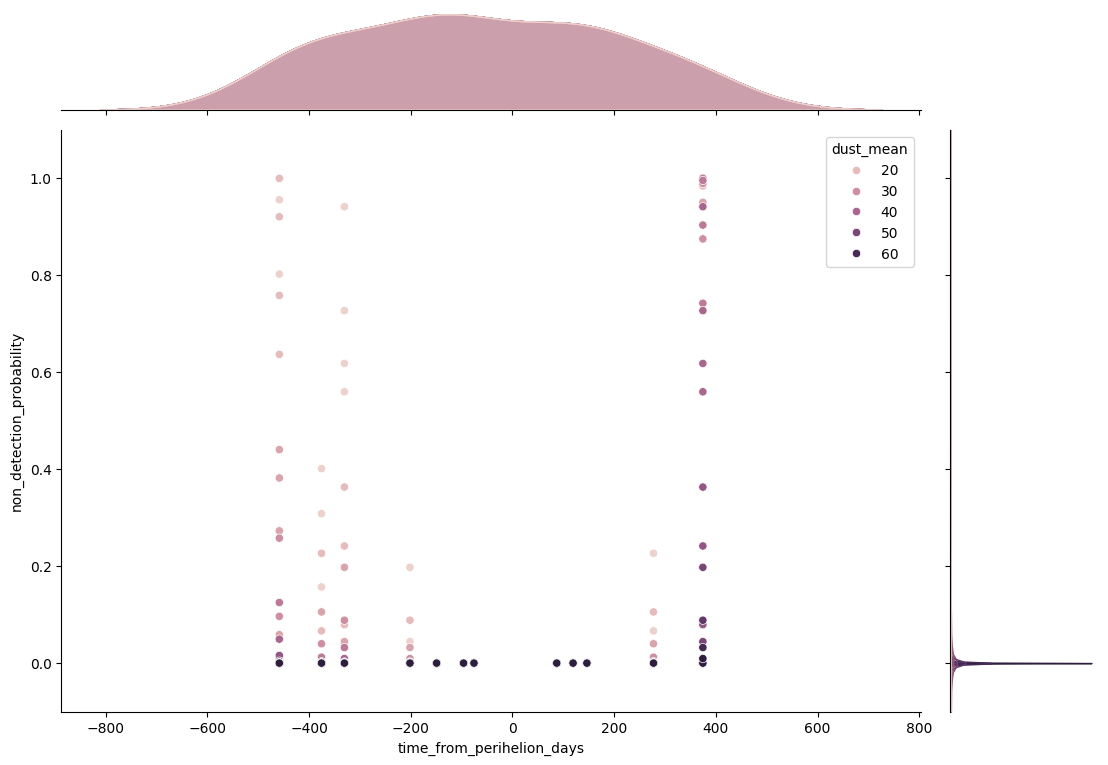

In [22]:
sns.jointplot(data=total_df, x='time_from_perihelion_days', y='non_detection_probability', hue='dust_mean')
plt.ylim(-0.1, 1.1)
fig = plt.gcf()
fig.set_size_inches(12, 8)

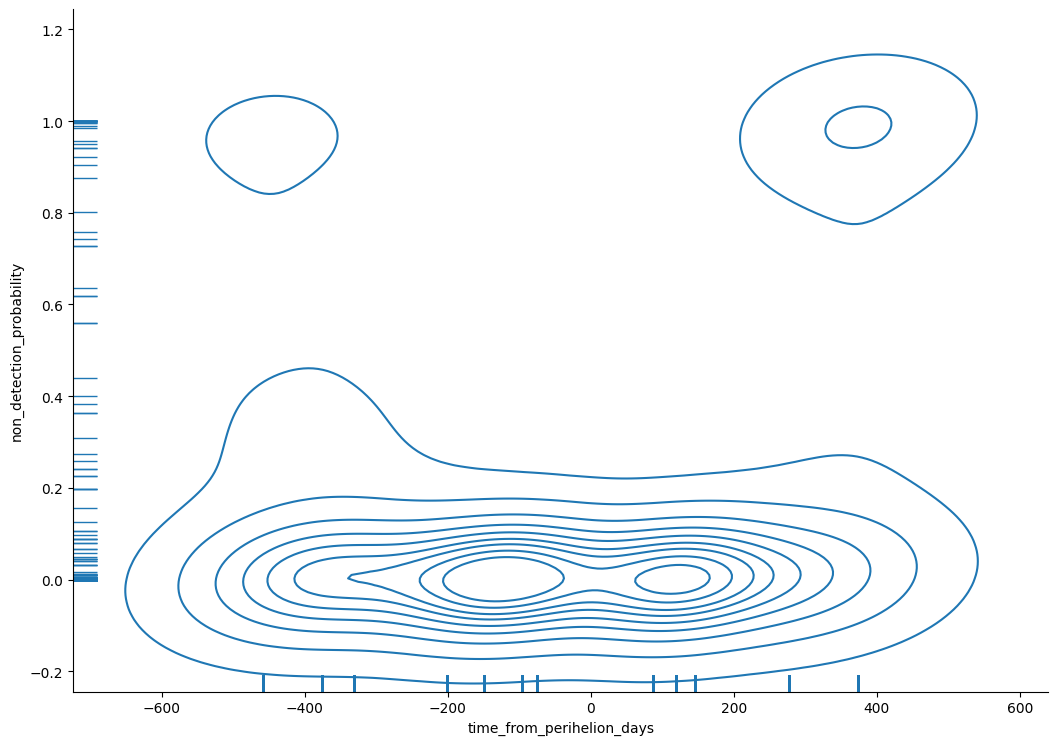

In [23]:
sns.displot(data=total_df, x='time_from_perihelion_days', y='non_detection_probability', kind='kde', rug=True)
fig = plt.gcf()
fig.set_size_inches(12, 8)

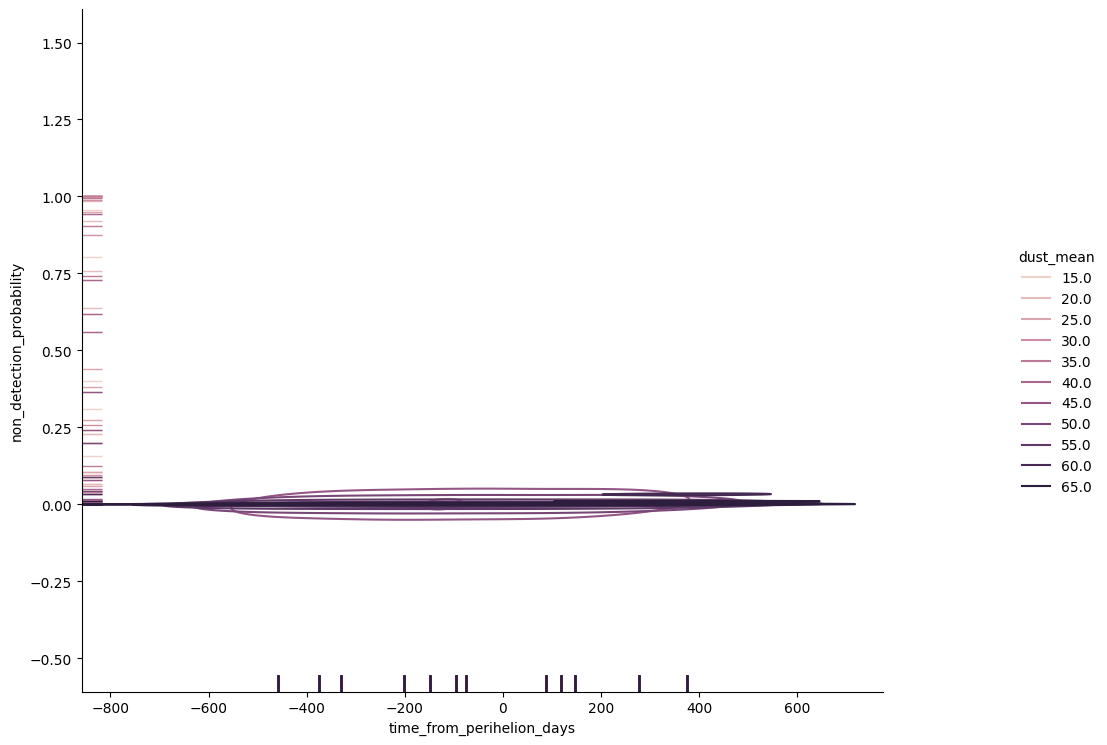

In [24]:
sns.displot(data=total_df, x='time_from_perihelion_days', y='non_detection_probability', kind='kde', rug=True, hue='dust_mean')
fig = plt.gcf()
fig.set_size_inches(12, 8)

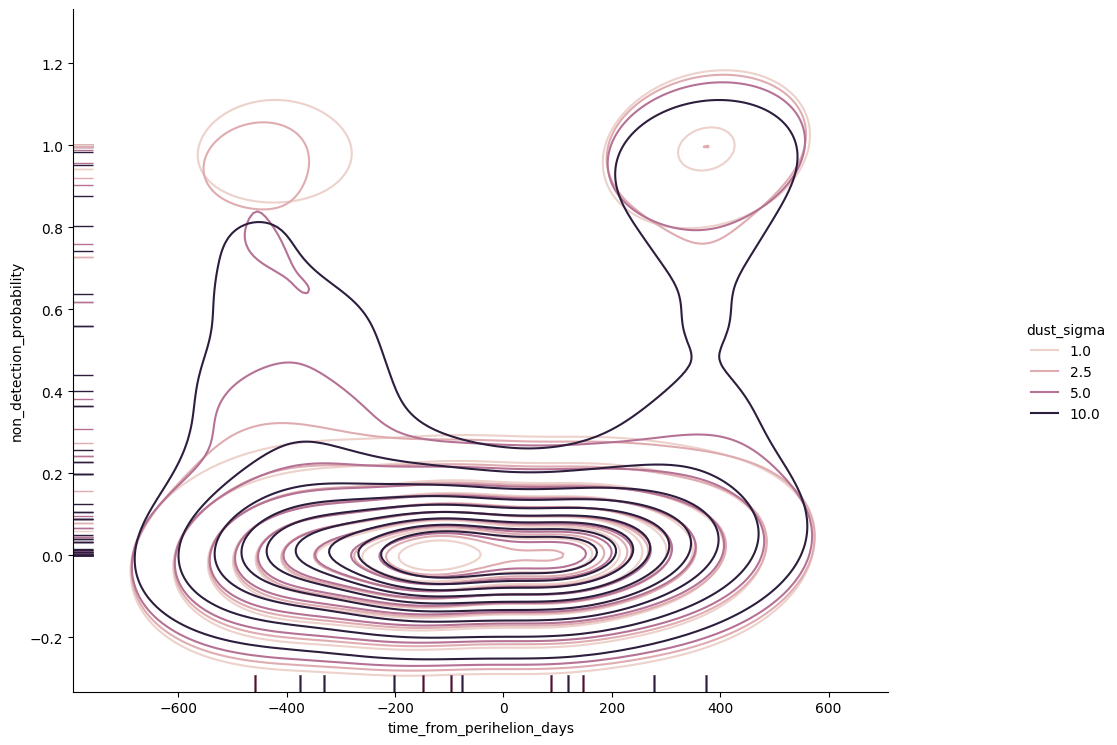

In [25]:
sns.displot(data=total_df, x='time_from_perihelion_days', y='non_detection_probability', kind='kde', rug=True, hue='dust_sigma')
fig = plt.gcf()
fig.set_size_inches(12, 8)

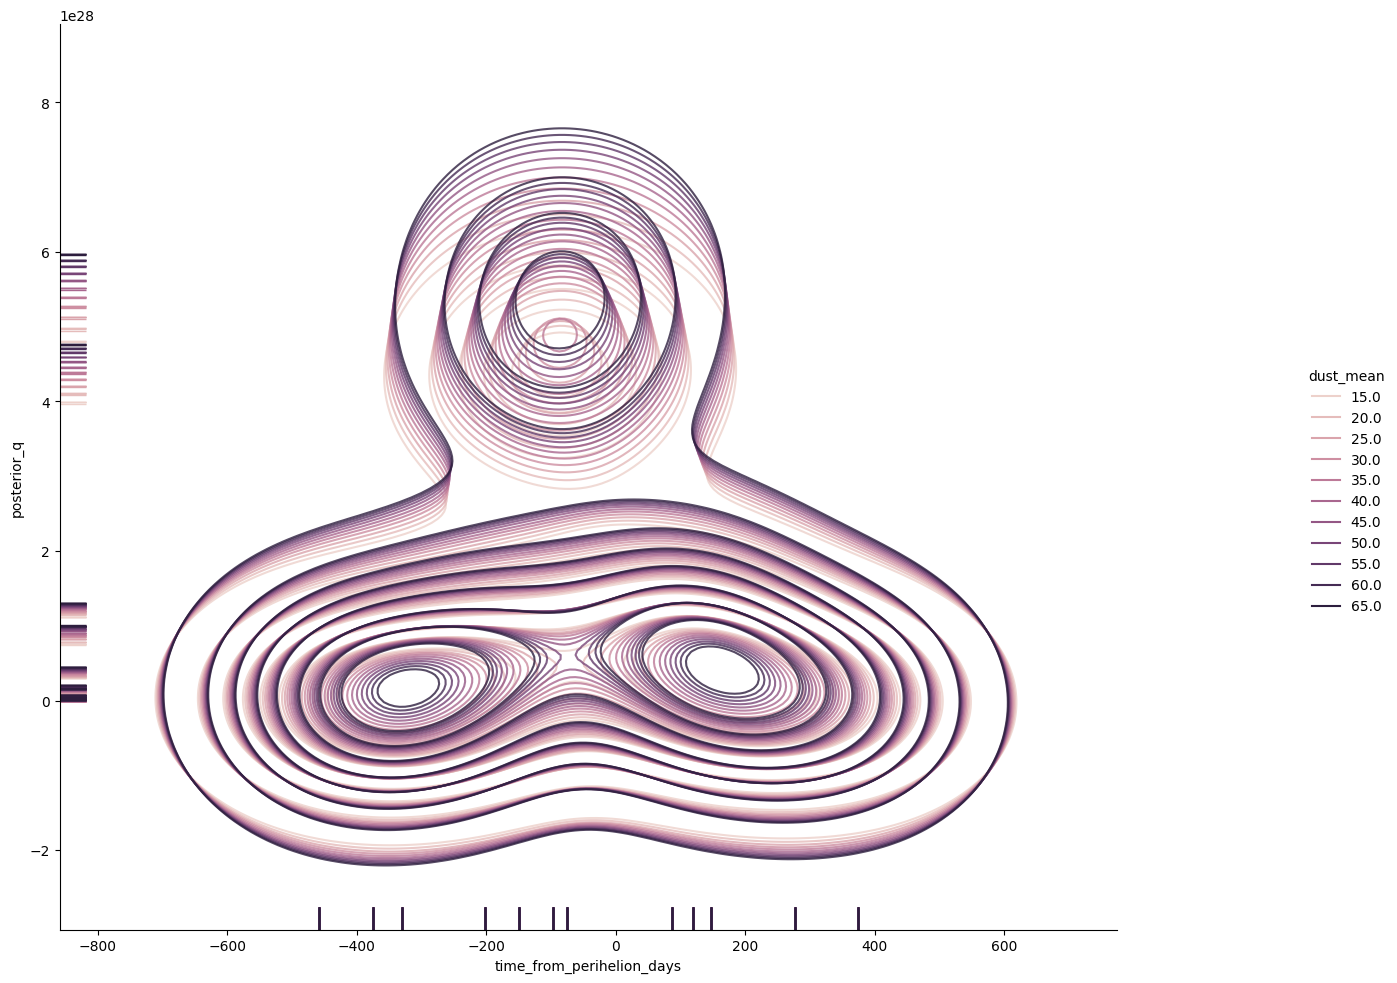

In [26]:
sns.displot(data=total_df, x='time_from_perihelion_days', y='posterior_q', kind='kde', rug=True, hue='dust_mean', alpha=0.8)
fig = plt.gcf()
fig.set_size_inches(15, 11)
#plt.yscale('log')
#plt.ylim(1.0e23, 1.0e29)

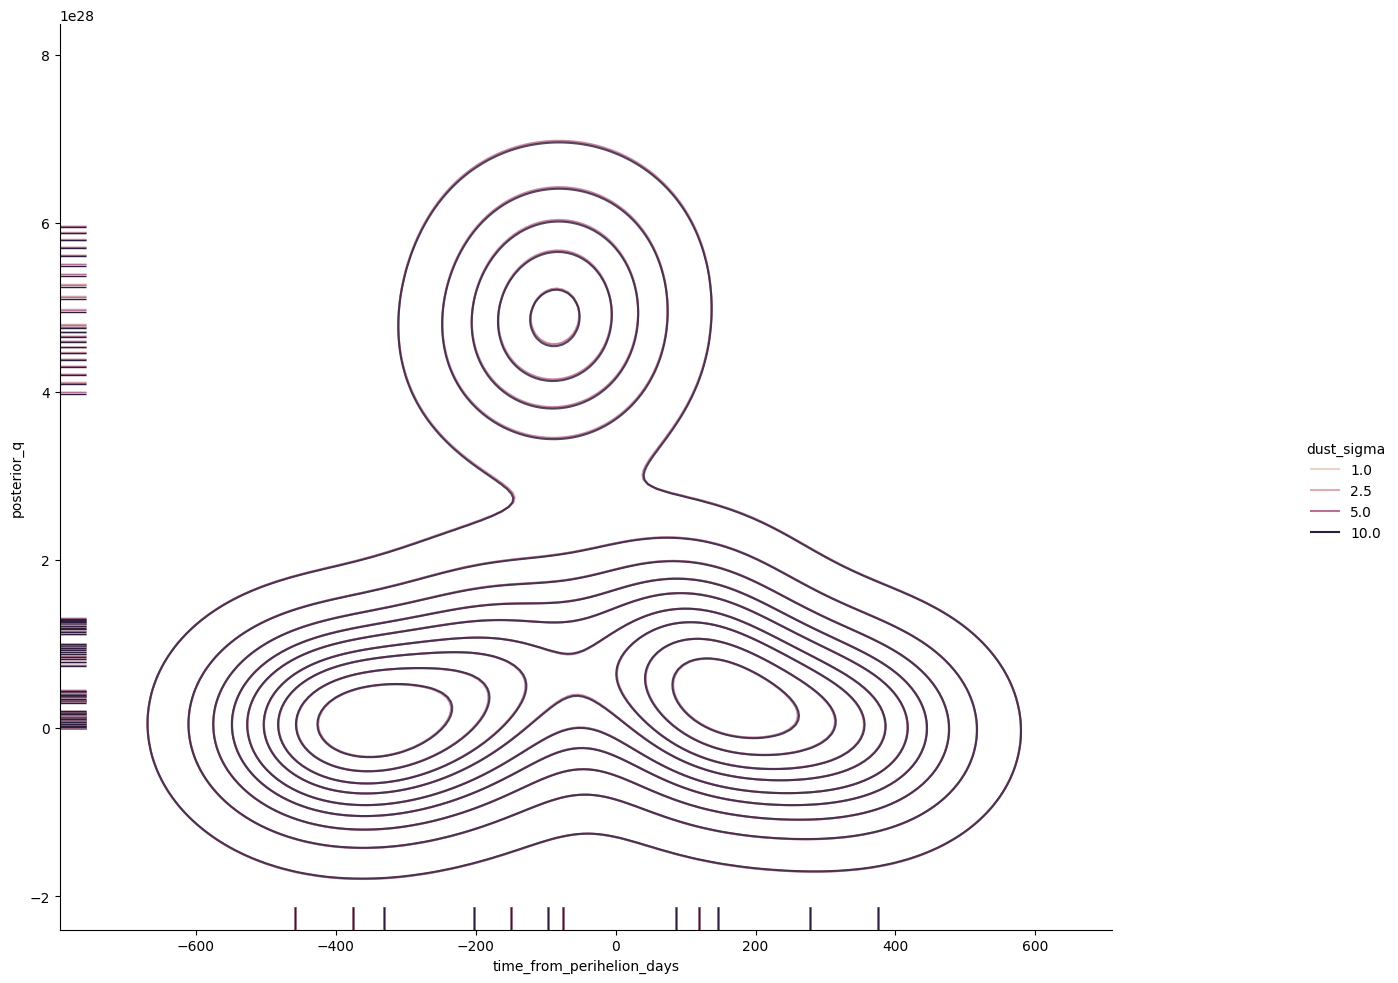

In [27]:
sns.displot(data=total_df, x='time_from_perihelion_days', y='posterior_q', kind='kde', rug=True, alpha=0.8, hue='dust_sigma')
fig = plt.gcf()
fig.set_size_inches(15, 11)
#plt.yscale('log')
#plt.ylim(1.0e23, 1.0e29)

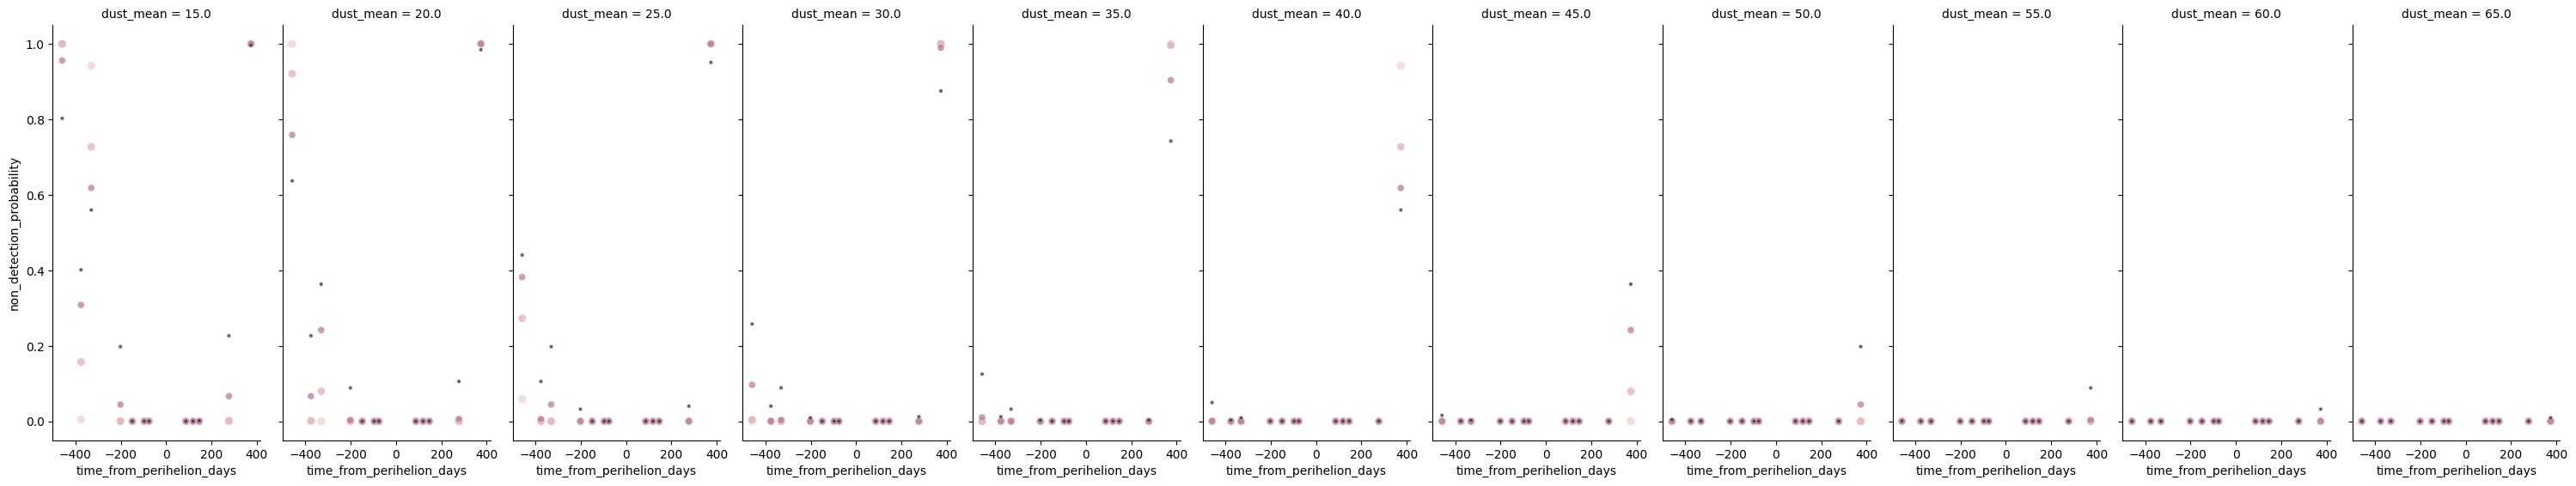

In [28]:
g = sns.FacetGrid(total_df, col="dust_mean")
g.map_dataframe(sns.scatterplot, data=total_df, x='time_from_perihelion_days', y='non_detection_probability', hue='dust_sigma', size='dust_sigma', sizes=(50, 10), alpha=0.7)
fig = plt.gcf()
fig.set_size_inches(30, 7)

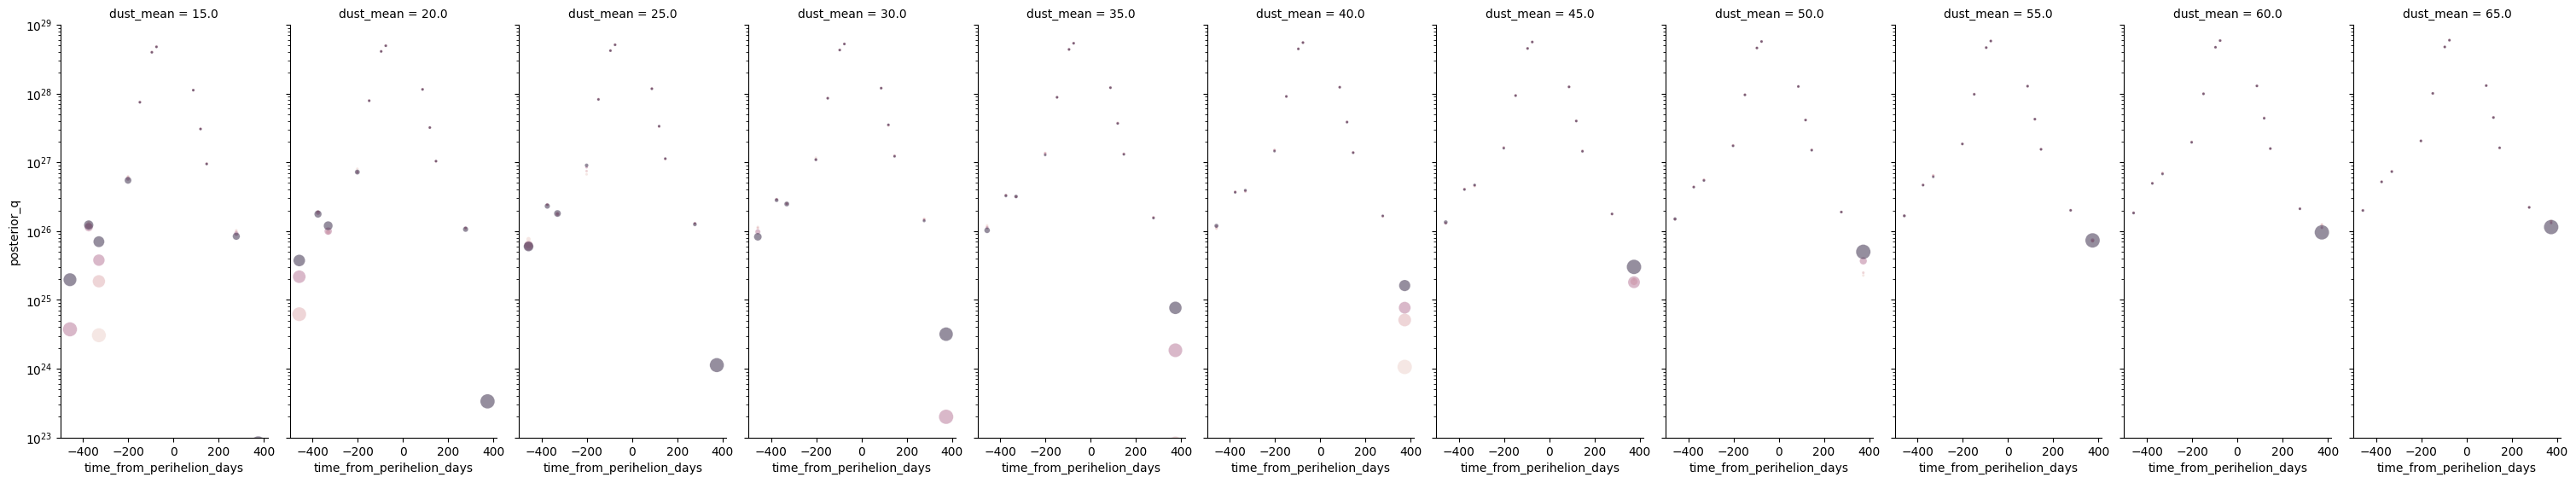

In [29]:
g = sns.FacetGrid(total_df, col="dust_mean")
g.map_dataframe(sns.scatterplot, data=total_df, x='time_from_perihelion_days', y='posterior_q', hue='dust_sigma', size='non_detection_probability', sizes=(5, 150), alpha=0.5)
#g.map_dataframe(sns.scatterplot, data=total_df, x='time_from_perihelion_days', y='posterior_q', hue='dust_sigma', size='non_detection_probability', sizes=(50, 10), alpha=0.7)
plt.yscale('log')
plt.ylim(1.0e23, 1.0e29)
fig = plt.gcf()
fig.set_size_inches(30, 7)

In [30]:
# sns.scatterplot(data=total_df, x='time_from_perihelion_days', y='posterior_q', hue='dust_mean', size='dust_sigma', alpha=0.5)
# ax2 = plt.twinx()
# sns.scatterplot(data=total_df, x='time_from_perihelion_days', y='non_detection_probability', hue='dust_mean', size='dust_sigma', ax=ax2)
# fig = plt.gcf()
# fig.set_size_inches(18.5, 10.5)

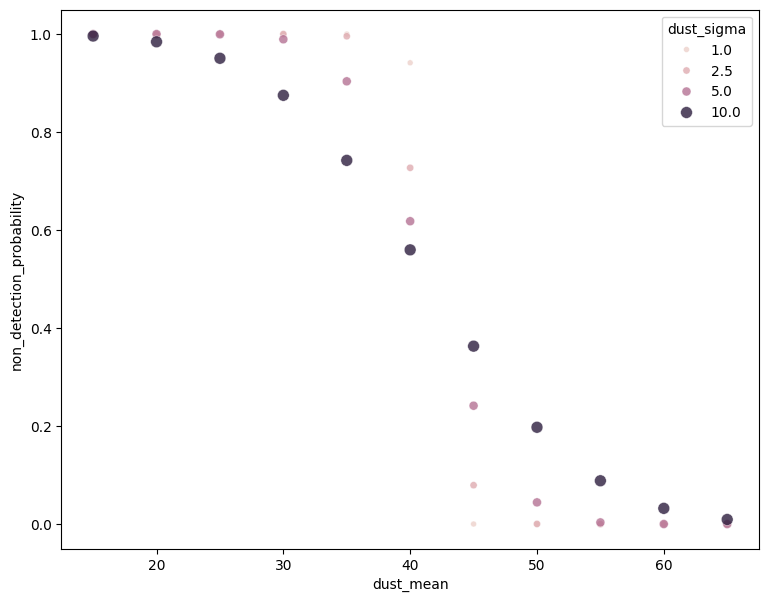

In [31]:
# what does the last observation's non-detection probability look like as a function of mean dust redness?
m = total_df.time_from_perihelion_days == total_df.time_from_perihelion_days.unique()[-1]
sns.scatterplot(data=total_df[m], x='dust_mean', y='non_detection_probability', size='dust_sigma', hue='dust_sigma', alpha=0.8)
fig = plt.gcf()
fig.set_size_inches(9, 7)

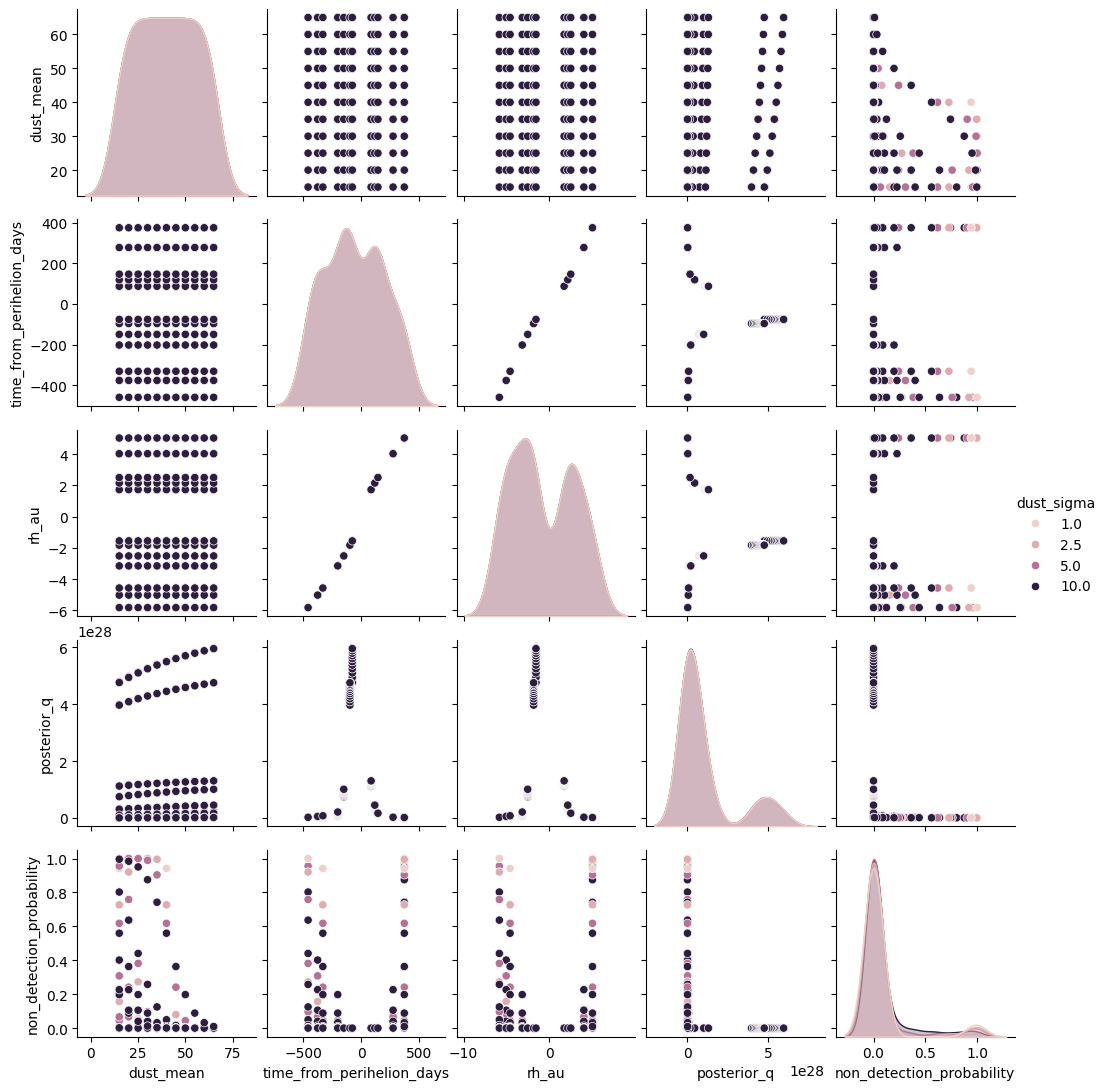

In [32]:
# sns.pairplot(data=total_df, x='rh_au', y='non_detection_probability', alpha=0.8, hue='dust_mean', size='dust_sigma')
sns.pairplot(total_df, hue='dust_sigma')
fig = plt.gcf()
fig.set_size_inches(11, 11)
#plt.yscale('log')
#plt.ylim(1.0e23, 1.0e29)

In [33]:
# sns.regplot(data=total_df, x='rh_au', y='posterior_q')
# sns.lineplot(data=total_df, x='rh_au', y='posterior_q')
# sns.displot(data=reduced_df, x='rh_au', y='posterior_q', kind='kde')

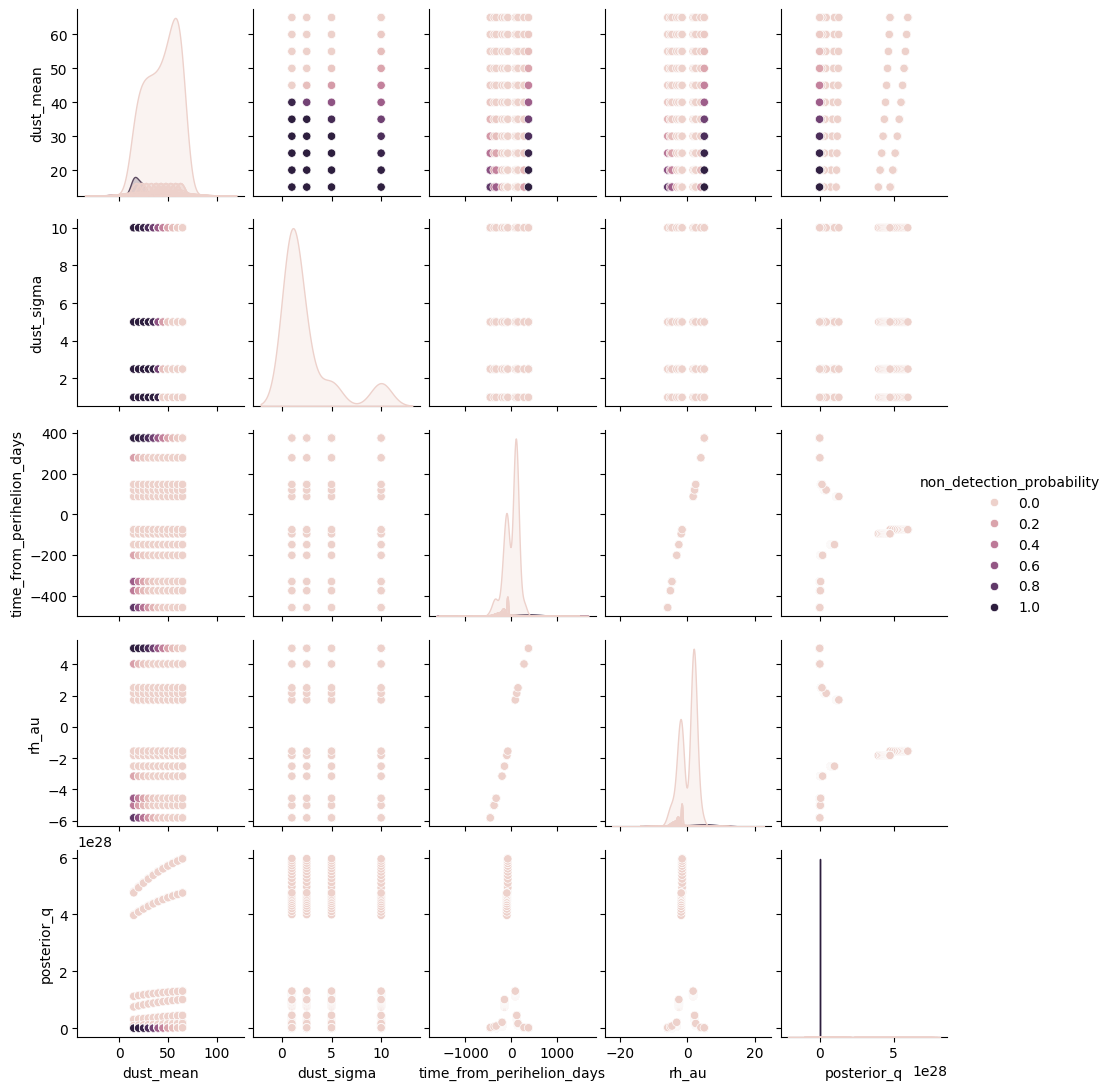

In [34]:
sns.pairplot(total_df, hue='non_detection_probability')
fig = plt.gcf()
fig.set_size_inches(11, 11)